 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
bathy_erddap = xr.open_dataset('/Users/sallen/Downloads/ubcSSnBathymetryV17-02_a29d_efc9_4047.nc')
elise = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/bathyOut.nc')
mymesh = xr.open_dataset('../../notebooks/VelocityFiles/newmesh.nc')

In [59]:
imin, imax = 798, 898
jmin, jmax = 50, 250

In [67]:
org_bathy = np.ma.masked_invalid(bathy_erddap.bathymetry.isel(gridX=slice(jmin, jmax)).isel(gridY=slice(imin, imax)))
elise_bathy = np.ma.masked_where(elise.bathy == 0, elise.bathy)[imin:imax, jmin:jmax]
my_bathy = np.ma.masked_where(mymesh.bathymetry == 0, mymesh.bathymetry)[imin:imax, jmin:jmax]

In [68]:
cmap = plt.get_cmap(cm.deep)
cmap.set_bad('burlywood')
cmap2 = plt.get_cmap('copper')
cmap3 = plt.get_cmap('bwr')
cmap3.set_bad('k')

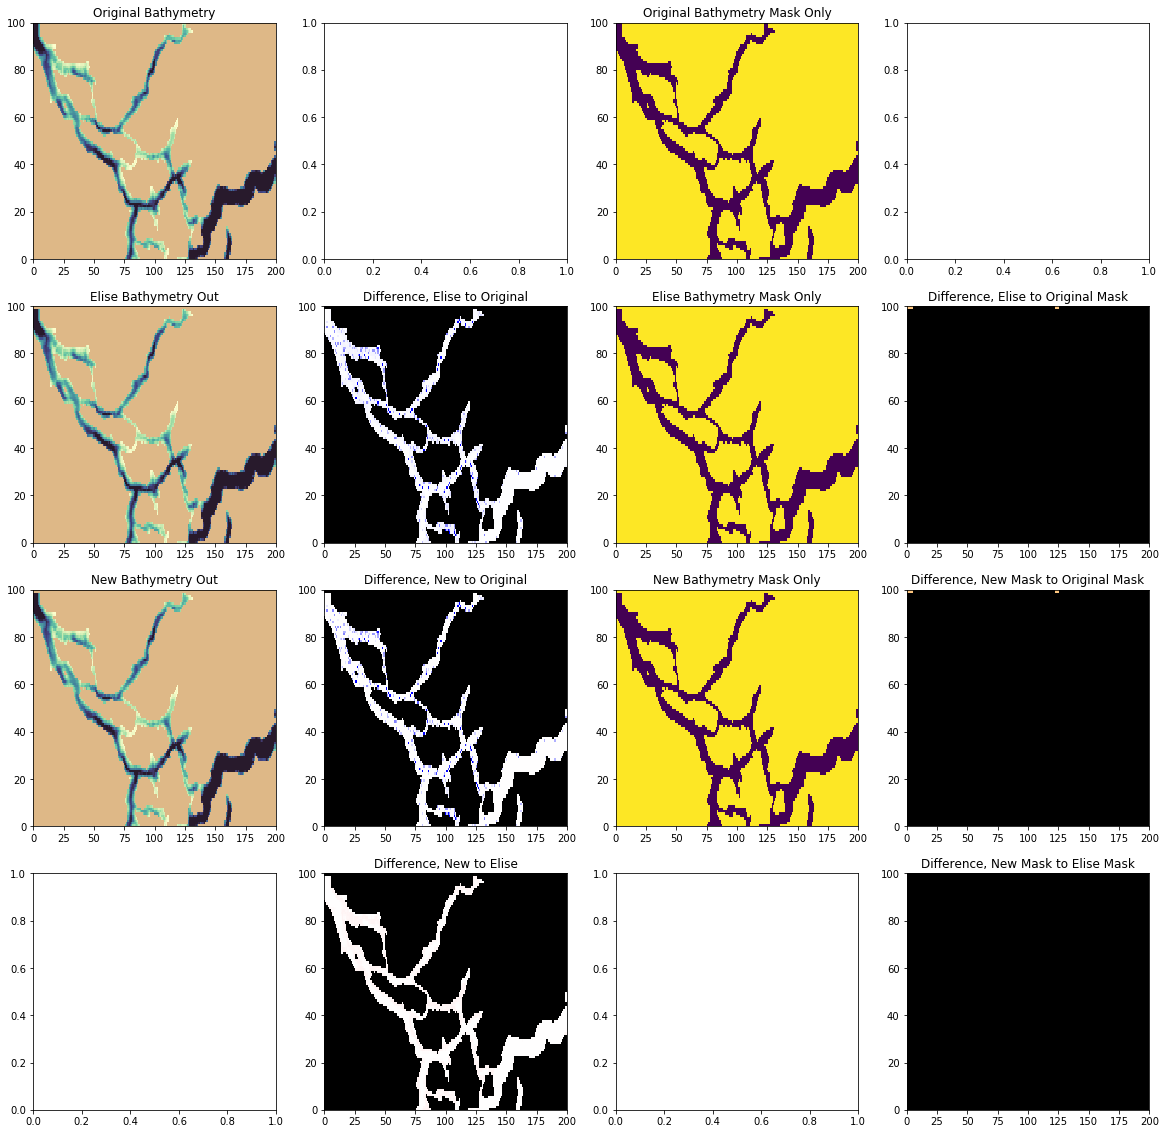

In [72]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs[0, 0].pcolormesh(org_bathy, vmax=250, vmin=4, cmap=cmap)
axs[0, 0].set_title('Original Bathymetry')
axs[0, 2].pcolormesh(np.ma.getmask(org_bathy))
axs[0, 2].set_title('Original Bathymetry Mask Only')
axs[1, 0].pcolormesh(elise_bathy, vmax=250, vmin=4, cmap=cmap)
axs[1, 0].set_title('Elise Bathymetry Out')
axs[1, 1].pcolormesh(elise_bathy - org_bathy, cmap=cmap3, vmax=4, vmin=-4)
axs[1, 1].set_title('Difference, Elise to Original')
axs[1, 2].pcolormesh(np.ma.getmask(elise_bathy))
axs[1, 2].set_title('Elise Bathymetry Mask Only')
axs[1, 3].pcolormesh(np.ma.getmask(elise_bathy) ^ np.ma.getmask(org_bathy), cmap=cmap2)
axs[1, 3].set_title('Difference, Elise to Original Mask')
axs[2, 0].pcolormesh(my_bathy, vmax=250, vmin=4, cmap=cmap)
axs[2, 0].set_title('New Bathymetry Out')
axs[2, 1].pcolormesh(my_bathy - org_bathy, cmap=cmap3, vmax=4, vmin=-4)
axs[2, 1].set_title('Difference, New to Original')
axs[2, 2].pcolormesh(np.ma.getmask(my_bathy))
axs[2, 2].set_title('New Bathymetry Mask Only')
axs[2, 3].pcolormesh(np.ma.getmask(my_bathy) ^ np.ma.getmask(org_bathy), cmap=cmap2)
axs[2, 3].set_title('Difference, New Mask to Original Mask')
axs[3, 1].pcolormesh(my_bathy - elise_bathy, cmap=cmap3, vmax=4, vmin=-4)
axs[3, 1].set_title('Difference, New to Elise')
axs[3, 3].pcolormesh(np.ma.getmask(my_bathy) ^ np.ma.getmask(elise_bathy), cmap=cmap2)
axs[3, 3].set_title('Difference, New Mask to Elise Mask');